In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Import and Clean Data

In [19]:
weekly_compound_sentiment = pd.read_csv('./weekly_mean_compound_sentiment_by_company.csv')

In [20]:
weekly_close_price = pd.read_csv('./weekly_mean_closing_price_by_ticker_all.csv')

In [21]:
weekly_compound_sentiment.set_index('Year-Week',inplace=True)

In [24]:
weekly_close_price.set_index('Year-Week', inplace=True)

In [32]:
weekly_compound_sentiment

,first_solar,meridian_energy,plug_power,siemens_gamesa,sunpower,sunrun
Year-Week,,,,,,
2011-00,0.000000,NaN,0.000000,0.660500,0.049007,0.612400
2011-01,0.104806,0.086267,0.411500,0.368786,0.211583,0.258227
2011-02,0.156867,-0.036133,0.164608,0.394021,0.293154,0.158023
2011-03,0.175914,0.462410,0.075040,0.433196,0.183861,0.152878
2011-04,0.137794,-0.112420,-0.067788,0.427480,0.212294,0.210925
...,...,...,...,...,...,...
2021-09,0.249066,0.435113,0.195052,0.399296,0.260569,0.186855
2021-10,0.235841,0.265605,0.150427,0.423702,0.225257,0.185681
2021-11,0.210958,0.298878,0.116072,0.382301,0.163135,0.168005


In [40]:
weekly_close_price

,COENF,DNNGY,DQ,ENPH,FSLR,GCTAY,ORA,RUN,SCTY,SPWR,TSLA,VWDRY
Year-Week,,,,,,,,,,,,
2004-45,NaN,NaN,NaN,NaN,NaN,NaN,15.8600,NaN,NaN,NaN,NaN,NaN
2004-46,NaN,NaN,NaN,NaN,NaN,NaN,15.8600,NaN,NaN,NaN,NaN,NaN
2004-47,NaN,NaN,NaN,NaN,NaN,NaN,16.8200,NaN,NaN,NaN,NaN,NaN
2004-48,NaN,NaN,NaN,NaN,NaN,NaN,17.4700,NaN,NaN,NaN,NaN,NaN
2004-49,NaN,NaN,NaN,NaN,NaN,NaN,16.8900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12,5.280,52.8650,71.8720,153.1220,81.8980,6.698000,76.3000,55.774,7.6970,32.3410,644.3060,60.800
2021-13,4.975,54.4175,70.8575,154.3975,85.3975,7.414375,77.1625,57.360,7.3400,31.8625,644.1475,67.290
2021-14,4.950,55.2425,68.9920,152.3660,81.8260,7.464000,76.5580,54.162,7.8660,30.7320,682.8920,67.114


# Merge Datasets

## Merge datasets of First Solar

In [28]:
first_solar = pd.DataFrame(weekly_compound_sentiment['first_solar'])
first_solar = pd.merge(first_solar, weekly_close_price['FSLR'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
first_solar.rename(columns={"first_solar":"Compound Sentiment","FSLR":"close"}, inplace=True)
first_solar.dropna(inplace=True)

## Merge datasets of Siemens

In [35]:
siemens = pd.DataFrame(weekly_compound_sentiment['siemens_gamesa'])
siemens = pd.merge(siemens, weekly_close_price['GCTAY'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
siemens.rename(columns={"siemens_gamesa":"Compound Sentiment","GCTAY":"close"}, inplace=True)
siemens.dropna(inplace=True)

## Merge datasets of Sunrun

In [42]:
sunrun = pd.DataFrame(weekly_compound_sentiment['sunrun'])
sunrun = pd.merge(sunrun, weekly_close_price['RUN'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
sunrun.rename(columns={"sunrun":"Compound Sentiment","RUN":"close"}, inplace=True)
sunrun.dropna(inplace=True)

# Lag Analysis 
----

In [36]:
def plot_cross_correlation(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Compound Sentiment'].to_numpy().flatten(), df['close'].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)
    ax1.grid(True)
    plt.show()

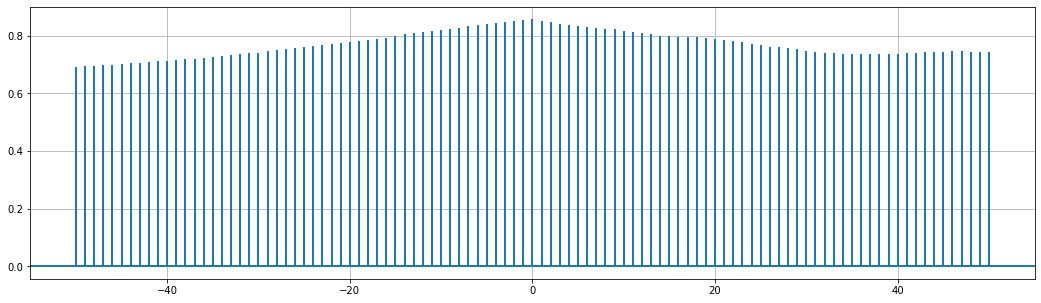

In [37]:
plot_cross_correlation(first_solar)

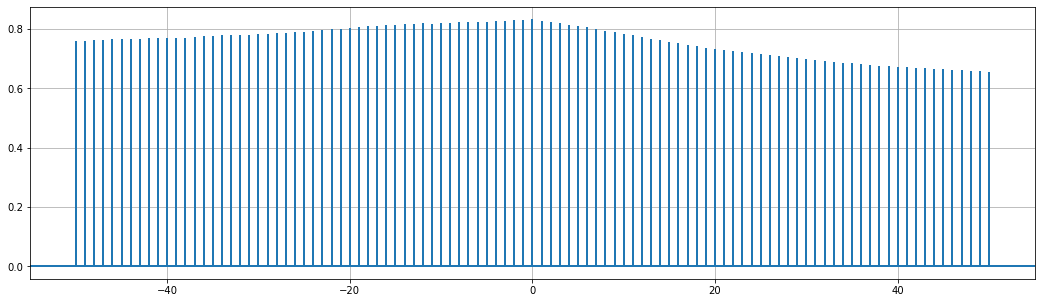

In [38]:
plot_cross_correlation(siemens)

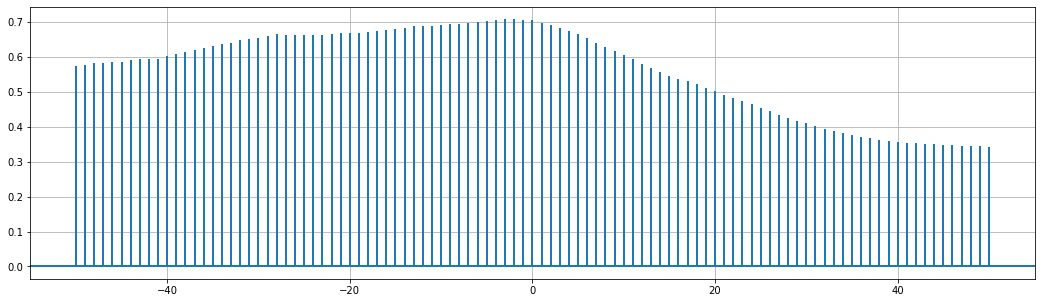

In [43]:
plot_cross_correlation(sunrun)

In [45]:
first_solar.to_csv('./first_solar_compound_sentiment_close_time_series.csv')